In [2]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import math as m
import numpy as np  # 1.7 or higher
from ipywidgets import interactive
from IPython.display import display, Image
import PIL
from io import BytesIO


import cv2


import qgrid
import pandas as pd

import sympy as sym
sym.init_printing(order="none")
from sympy.vector import CoordSys3D
import sympy.vector as symvec


np.set_printoptions(suppress=True, 
                    formatter={'float_kind':'{:14.4f}'.format})  
%matplotlib inline


def display_img_array(ima):
    im = PIL.Image.fromarray(ima)
    bio = BytesIO()
    im.save(bio, format='png')
    display(Image(bio.getvalue(), format='png'))

def display_image(path):
    pil_im = PIL.Image.open(path)
    display(pil_im)



# embed python variables in latex
# then render with md
lx = lambda c: "$" + sym.latex(c) + "$"


In [3]:
posedf = pd.read_csv("Pose_est-2024-06-01T14:41:06.457116.csv")

pose_widget = qgrid.show_grid(posedf, 
                            grid_options={'forceFitColumns': False, 'defaultColumnWidth': 100},
                            show_toolbar=True)
display(pose_widget)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

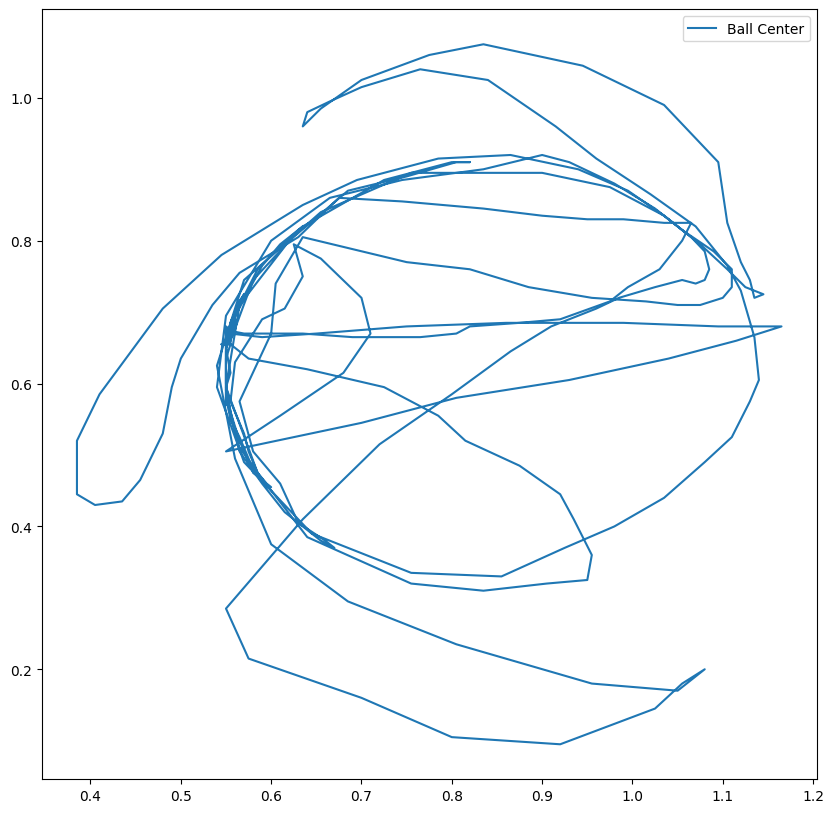

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
#ax.set_aspect('equal')

tim = posedf['time'].to_numpy()
tim = tim-tim[0]
#tim *= 1000

c1x = posedf['c1x'].to_numpy() / 400
c1y = posedf['c1y'].to_numpy() / 400

ax.plot(c1x, c1y, label="Ball Center")
#ax.plot(tim, joydf2['yaw'].to_numpy(), label='yaw')
#ax.plot(tim, joydf2['glyph'].to_numpy()/40.0, label='glyph')

#ax.set_title("Joystick characterization")
#ax.set_xlabel("Time(ms)")

ax.legend()